In [1]:
# This allows us to show the full screen width

from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [2]:
import pandas as pd
import numpy as np

### Step 1: Data preparation

In [3]:
# Load the data
BLmod = pd.read_excel("Assignment Data/Week 3/Bundesliga prediction model (Assignment).xlsx")
BLmod

,Date,gameno,day,month,year,HomeTeam,AwayTeam,FTHG,FTAG,FTR,B365H,B365D,B365A,Tmhome,Tmaway
0,16/08/2019,1,16,8,2019,Bayern Munich,Hertha,2,2,D,1.14,8.00,15.00,116.05,215.20
1,17/08/2019,2,17,8,2019,Dortmund,Augsburg,5,1,H,1.20,7.00,13.00,790.40,116.05
2,17/08/2019,3,17,8,2019,Wolfsburg,FC Koln,2,1,H,1.95,3.50,4.00,162.28,101.10
3,17/08/2019,4,17,8,2019,Werder Bremen,Fortuna Dusseldorf,1,3,A,1.75,3.75,4.75,35.58,81.65
4,17/08/2019,5,17,8,2019,Freiburg,Mainz,3,0,H,2.25,3.25,3.40,81.65,148.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,27/06/2020,302,27,6,2020,Dortmund,Hoffenheim,0,4,A,1.70,4.50,4.10,642.10,229.50
302,27/06/2020,303,27,6,2020,Leverkusen,Mainz,1,0,H,1.25,6.50,10.00,420.60,148.60
303,27/06/2020,304,27,6,2020,Ein Frankfurt,Paderborn,3,2,H,1.30,5.75,9.00,207.55,24.10
304,27/06/2020,305,27,6,2020,Augsburg,RB Leipzig,1,2,A,7.00,5.75,1.36,116.05,521.90


<div>
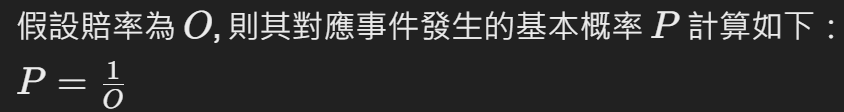
</div>

<div>
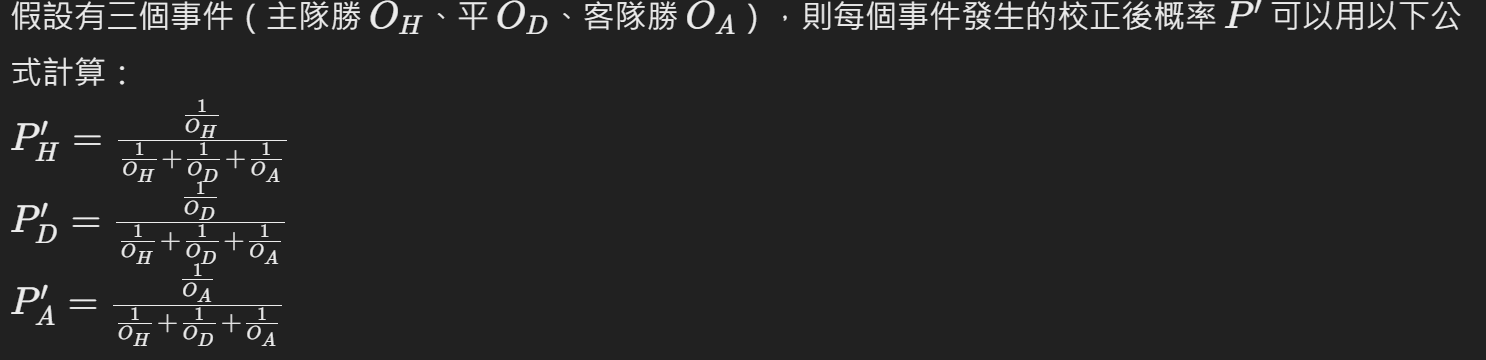
</div>

In [4]:
# Define the result (H, D, A) and the probabilities associated with bookmaker odds
# H = home win, A = away win, D = draw (tie)

BLmod['B365HPr']= 1/(BLmod['B365H'])/(1/(BLmod['B365H'])+ 1/(BLmod['B365D'])+ 1/(BLmod['B365A']))
BLmod['B365DPr']= 1/(BLmod['B365D'])/(1/(BLmod['B365H'])+ 1/(BLmod['B365D'])+ 1/(BLmod['B365A']))
BLmod['B365APr']= 1/(BLmod['B365A'])/(1/(BLmod['B365H'])+ 1/(BLmod['B365D'])+ 1/(BLmod['B365A']))
BLmod

,Date,gameno,day,month,year,HomeTeam,AwayTeam,FTHG,FTAG,FTR,B365H,B365D,B365A,Tmhome,Tmaway,B365HPr,B365DPr,B365APr
0,16/08/2019,1,16,8,2019,Bayern Munich,Hertha,2,2,D,1.14,8.00,15.00,116.05,215.20,0.820681,0.116947,0.062372
1,17/08/2019,2,17,8,2019,Dortmund,Augsburg,5,1,H,1.20,7.00,13.00,790.40,116.05,0.791304,0.135652,0.073043
2,17/08/2019,3,17,8,2019,Wolfsburg,FC Koln,2,1,H,1.95,3.50,4.00,162.28,101.10,0.489083,0.272489,0.238428
3,17/08/2019,4,17,8,2019,Werder Bremen,Fortuna Dusseldorf,1,3,A,1.75,3.75,4.75,35.58,81.65,0.544933,0.254302,0.200765
4,17/08/2019,5,17,8,2019,Freiburg,Mainz,3,0,H,2.25,3.25,3.40,81.65,148.60,0.424796,0.294089,0.281115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,27/06/2020,302,27,6,2020,Dortmund,Hoffenheim,0,4,A,1.70,4.50,4.10,642.10,229.50,0.557907,0.210765,0.231327
302,27/06/2020,303,27,6,2020,Leverkusen,Mainz,1,0,H,1.25,6.50,10.00,420.60,148.60,0.759124,0.145985,0.094891
303,27/06/2020,304,27,6,2020,Ein Frankfurt,Paderborn,3,2,H,1.30,5.75,9.00,207.55,24.10,0.729644,0.164963,0.105393
304,27/06/2020,305,27,6,2020,Augsburg,RB Leipzig,1,2,A,7.00,5.75,1.36,116.05,521.90,0.135787,0.165306,0.698906


In [5]:
# Define a winvalue = 2 if the home team wins, 1 if the game is a draw and zero otherwise

BLmod["winvalue"] = np.where( BLmod["FTR"] == "H", 2, np.where(BLmod["FTR"] == "D", 1, 0 ) )
BLmod

,Date,gameno,day,month,year,HomeTeam,AwayTeam,FTHG,FTAG,FTR,B365H,B365D,B365A,Tmhome,Tmaway,B365HPr,B365DPr,B365APr,winvalue
0,16/08/2019,1,16,8,2019,Bayern Munich,Hertha,2,2,D,1.14,8.00,15.00,116.05,215.20,0.820681,0.116947,0.062372,1
1,17/08/2019,2,17,8,2019,Dortmund,Augsburg,5,1,H,1.20,7.00,13.00,790.40,116.05,0.791304,0.135652,0.073043,2
2,17/08/2019,3,17,8,2019,Wolfsburg,FC Koln,2,1,H,1.95,3.50,4.00,162.28,101.10,0.489083,0.272489,0.238428,2
3,17/08/2019,4,17,8,2019,Werder Bremen,Fortuna Dusseldorf,1,3,A,1.75,3.75,4.75,35.58,81.65,0.544933,0.254302,0.200765,0
4,17/08/2019,5,17,8,2019,Freiburg,Mainz,3,0,H,2.25,3.25,3.40,81.65,148.60,0.424796,0.294089,0.281115,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,27/06/2020,302,27,6,2020,Dortmund,Hoffenheim,0,4,A,1.70,4.50,4.10,642.10,229.50,0.557907,0.210765,0.231327,0
302,27/06/2020,303,27,6,2020,Leverkusen,Mainz,1,0,H,1.25,6.50,10.00,420.60,148.60,0.759124,0.145985,0.094891,2
303,27/06/2020,304,27,6,2020,Ein Frankfurt,Paderborn,3,2,H,1.30,5.75,9.00,207.55,24.10,0.729644,0.164963,0.105393,2
304,27/06/2020,305,27,6,2020,Augsburg,RB Leipzig,1,2,A,7.00,5.75,1.36,116.05,521.90,0.135787,0.165306,0.698906,0


In [6]:
# Define a predicted variable equal to H if the home team wins and A if the visiting team wins
BLmod["Est_FTR"] = np.where( (BLmod["B365HPr"] > BLmod["B365APr"]) & (BLmod["B365HPr"] > BLmod["B365DPr"]), "H",
                                  np.where( (BLmod["B365APr"] > BLmod["B365HPr"]) & (BLmod["B365APr"] > BLmod["B365DPr"]), "A", "D" )
                           )
BLmod

,Date,gameno,day,month,year,HomeTeam,AwayTeam,FTHG,FTAG,FTR,B365H,B365D,B365A,Tmhome,Tmaway,B365HPr,B365DPr,B365APr,winvalue,Est_FTR
0,16/08/2019,1,16,8,2019,Bayern Munich,Hertha,2,2,D,1.14,8.00,15.00,116.05,215.20,0.820681,0.116947,0.062372,1,H
1,17/08/2019,2,17,8,2019,Dortmund,Augsburg,5,1,H,1.20,7.00,13.00,790.40,116.05,0.791304,0.135652,0.073043,2,H
2,17/08/2019,3,17,8,2019,Wolfsburg,FC Koln,2,1,H,1.95,3.50,4.00,162.28,101.10,0.489083,0.272489,0.238428,2,H
3,17/08/2019,4,17,8,2019,Werder Bremen,Fortuna Dusseldorf,1,3,A,1.75,3.75,4.75,35.58,81.65,0.544933,0.254302,0.200765,0,H
4,17/08/2019,5,17,8,2019,Freiburg,Mainz,3,0,H,2.25,3.25,3.40,81.65,148.60,0.424796,0.294089,0.281115,2,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,27/06/2020,302,27,6,2020,Dortmund,Hoffenheim,0,4,A,1.70,4.50,4.10,642.10,229.50,0.557907,0.210765,0.231327,0,H
302,27/06/2020,303,27,6,2020,Leverkusen,Mainz,1,0,H,1.25,6.50,10.00,420.60,148.60,0.759124,0.145985,0.094891,2,H
303,27/06/2020,304,27,6,2020,Ein Frankfurt,Paderborn,3,2,H,1.30,5.75,9.00,207.55,24.10,0.729644,0.164963,0.105393,2,H
304,27/06/2020,305,27,6,2020,Augsburg,RB Leipzig,1,2,A,7.00,5.75,1.36,116.05,521.90,0.135787,0.165306,0.698906,0,A


In [7]:
# Generate a crosstab to compare the predictions of the bookmaker with the actual outcomes
pd.crosstab(BLmod["FTR"], BLmod["Est_FTR"],dropna= True)

Est_FTR,A,H
FTR,,
A,63,52
D,18,50
H,28,95


In [8]:
# Define a variable equal to the logarithm of the ratio of the home team TMvalue to the visiting team TMvalue.
BLmod['log_TM_ratio'] = np.log(BLmod['Tmhome']/BLmod['Tmaway'])
BLmod

,Date,gameno,day,month,year,HomeTeam,AwayTeam,FTHG,FTAG,FTR,...,B365D,B365A,Tmhome,Tmaway,B365HPr,B365DPr,B365APr,winvalue,Est_FTR,log_TM_ratio
0,16/08/2019,1,16,8,2019,Bayern Munich,Hertha,2,2,D,...,8.00,15.00,116.05,215.20,0.820681,0.116947,0.062372,1,H,-0.617547
1,17/08/2019,2,17,8,2019,Dortmund,Augsburg,5,1,H,...,7.00,13.00,790.40,116.05,0.791304,0.135652,0.073043,2,H,1.918518
2,17/08/2019,3,17,8,2019,Wolfsburg,FC Koln,2,1,H,...,3.50,4.00,162.28,101.10,0.489083,0.272489,0.238428,2,H,0.473213
3,17/08/2019,4,17,8,2019,Werder Bremen,Fortuna Dusseldorf,1,3,A,...,3.75,4.75,35.58,81.65,0.544933,0.254302,0.200765,0,H,-0.830658
4,17/08/2019,5,17,8,2019,Freiburg,Mainz,3,0,H,...,3.25,3.40,81.65,148.60,0.424796,0.294089,0.281115,2,H,-0.598816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,27/06/2020,302,27,6,2020,Dortmund,Hoffenheim,0,4,A,...,4.50,4.10,642.10,229.50,0.557907,0.210765,0.231327,0,H,1.028841
302,27/06/2020,303,27,6,2020,Leverkusen,Mainz,1,0,H,...,6.50,10.00,420.60,148.60,0.759124,0.145985,0.094891,2,H,1.040424
303,27/06/2020,304,27,6,2020,Ein Frankfurt,Paderborn,3,2,H,...,5.75,9.00,207.55,24.10,0.729644,0.164963,0.105393,2,H,2.153160
304,27/06/2020,305,27,6,2020,Augsburg,RB Leipzig,1,2,A,...,5.75,1.36,116.05,521.90,0.135787,0.165306,0.698906,0,A,-1.503455


### Step 2: Estimate a logit model of home time wins depending on the log TMvalue ratio, using the data for gamenos 1 to 224  as the “training data”.

In [9]:
# Define a subset for games 1 to 224 
BLmod_training = BLmod[BLmod["gameno"] <= 224]
BLmod_training

,Date,gameno,day,month,year,HomeTeam,AwayTeam,FTHG,FTAG,FTR,...,B365D,B365A,Tmhome,Tmaway,B365HPr,B365DPr,B365APr,winvalue,Est_FTR,log_TM_ratio
0,16/08/2019,1,16,8,2019,Bayern Munich,Hertha,2,2,D,...,8.00,15.00,116.05,215.20,0.820681,0.116947,0.062372,1,H,-0.617547
1,17/08/2019,2,17,8,2019,Dortmund,Augsburg,5,1,H,...,7.00,13.00,790.40,116.05,0.791304,0.135652,0.073043,2,H,1.918518
2,17/08/2019,3,17,8,2019,Wolfsburg,FC Koln,2,1,H,...,3.50,4.00,162.28,101.10,0.489083,0.272489,0.238428,2,H,0.473213
3,17/08/2019,4,17,8,2019,Werder Bremen,Fortuna Dusseldorf,1,3,A,...,3.75,4.75,35.58,81.65,0.544933,0.254302,0.200765,0,H,-0.830658
4,17/08/2019,5,17,8,2019,Freiburg,Mainz,3,0,H,...,3.25,3.40,81.65,148.60,0.424796,0.294089,0.281115,2,H,-0.598816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2020-07-03 00:00:00,220,7,3,2020,Freiburg,Union Berlin,3,1,H,...,3.40,3.10,113.98,35.58,0.413495,0.279718,0.306787,2,H,1.164239
220,2020-07-03 00:00:00,221,7,3,2020,Hertha,Werder Bremen,2,2,D,...,3.50,3.40,215.20,162.28,0.450928,0.270557,0.278515,1,H,0.282245
221,2020-08-03 00:00:00,222,8,3,2020,Bayern Munich,Augsburg,2,0,H,...,10.00,21.00,790.40,116.05,0.859212,0.095373,0.045415,2,H,1.918518
222,2020-08-03 00:00:00,223,8,3,2020,Mainz,Fortuna Dusseldorf,1,1,D,...,3.75,3.80,148.60,81.65,0.498339,0.252492,0.249169,1,H,0.598816


In [10]:
# Import the ordered logistic regression package 
from bevel.linear_ordinal_regression import OrderedLogit
ol = OrderedLogit()

In [11]:
# Run the ordered logistic regression of winvalue on the log TMvalue ratio 
ol.fit(BLmod_training['log_TM_ratio'], BLmod_training['winvalue'])
ol.print_summary()

n=224
                  beta  se(beta)      p  lower 0.95  upper 0.95     
attribute names                                                     
column_1        0.5981    0.1129 0.0000      0.3769      0.8193  ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Somers' D = 0.278


In [12]:
#%% To get the coefficients and the intercepts
print(f'beta = {ol.coef_[0]:.4f}')
print(f'interceptAD = {ol.coef_[1]:.4f}')
print(f'interceptDH = {ol.coef_[2]:.4f}')

beta = 0.5981
interceptAD = -0.6734
interceptDH = 0.3356


In [13]:
#standard error
print(ol.se_)

[0.11286495 0.14796781 0.14269815]


In [14]:
pd.crosstab(BLmod_training["FTR"], BLmod_training["Est_FTR"],dropna= True)

Est_FTR,A,H
FTR,,
A,40,38
D,12,37
H,24,73


<div>
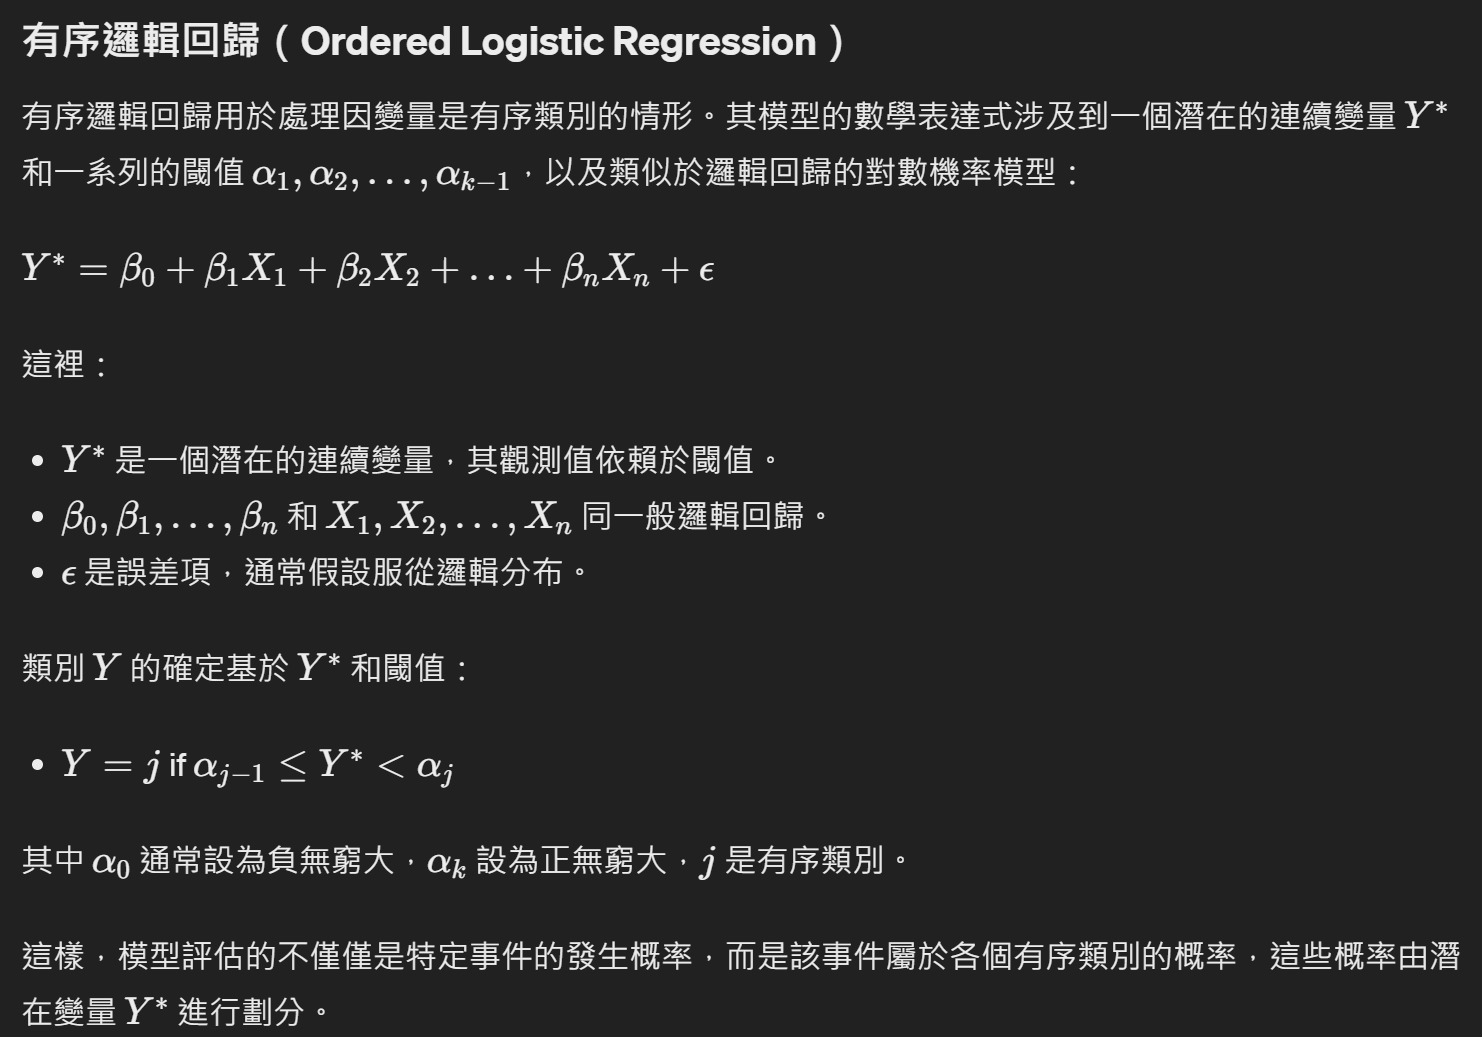
</div>

### Step 3: Define the predicted probabilities and the predicted results, using the entire data set

In [15]:
# Define the predicted probabilities from the logit regression.

# The logit regression equation has the form log(p/(1-p)) = a + bX.
# By rearranging this equation we can obtain p = 1/(1+ exp(a +bX)).
BLmod_training['predA'] = 1/(1+np.exp(-(ol.coef_[1]-ol.coef_[0]*BLmod_training['log_TM_ratio'])))
BLmod_training['predD'] = 1/(1+np.exp(-(ol.coef_[2]-ol.coef_[0]*BLmod_training['log_TM_ratio']))) - BLmod_training['predA']
BLmod_training['predH'] = 1 - BLmod_training['predA'] - BLmod_training['predD']

pd.set_option('display.max_columns', 50)
BLmod_training

,Date,gameno,day,month,year,HomeTeam,AwayTeam,FTHG,FTAG,FTR,B365H,B365D,B365A,Tmhome,Tmaway,B365HPr,B365DPr,B365APr,winvalue,Est_FTR,log_TM_ratio,predA,predD,predH
0,16/08/2019,1,16,8,2019,Bayern Munich,Hertha,2,2,D,1.14,8.00,15.00,116.05,215.20,0.820681,0.116947,0.062372,1,H,-0.617547,0.424580,0.244701,0.330720
1,17/08/2019,2,17,8,2019,Dortmund,Augsburg,5,1,H,1.20,7.00,13.00,790.40,116.05,0.791304,0.135652,0.073043,2,H,1.918518,0.139329,0.168148,0.692524
2,17/08/2019,3,17,8,2019,Wolfsburg,FC Koln,2,1,H,1.95,3.50,4.00,162.28,101.10,0.489083,0.272489,0.238428,2,H,0.473213,0.277598,0.235530,0.486872
3,17/08/2019,4,17,8,2019,Werder Bremen,Fortuna Dusseldorf,1,3,A,1.75,3.75,4.75,35.58,81.65,0.544933,0.254302,0.200765,0,H,-0.830658,0.455981,0.240881,0.303138
4,17/08/2019,5,17,8,2019,Freiburg,Mainz,3,0,H,2.25,3.25,3.40,81.65,148.60,0.424796,0.294089,0.281115,2,H,-0.598816,0.421845,0.244951,0.333204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2020-07-03 00:00:00,220,7,3,2020,Freiburg,Union Berlin,3,1,H,2.30,3.40,3.10,113.98,35.58,0.413495,0.279718,0.306787,2,H,1.164239,0.202664,0.208103,0.589233
220,2020-07-03 00:00:00,221,7,3,2020,Hertha,Werder Bremen,2,2,D,2.10,3.50,3.40,215.20,162.28,0.450928,0.270557,0.278515,1,H,0.282245,0.301075,0.240516,0.458410
221,2020-08-03 00:00:00,222,8,3,2020,Bayern Munich,Augsburg,2,0,H,1.11,10.00,21.00,790.40,116.05,0.859212,0.095373,0.045415,2,H,1.918518,0.139329,0.168148,0.692524
222,2020-08-03 00:00:00,223,8,3,2020,Mainz,Fortuna Dusseldorf,1,1,D,1.90,3.75,3.80,148.60,81.65,0.498339,0.252492,0.249169,1,H,0.598816,0.262787,0.231563,0.505650


In [16]:
# Based on the predicted probability, define the predicted result (H, D or A).
BLmod_training["pred_FTR"] = np.where( (BLmod_training["predH"] > BLmod_training["predA"]) & (BLmod_training["predH"] > BLmod_training["predD"]), "H",
                                  np.where( (BLmod_training["predA"] > BLmod_training["predH"]) & (BLmod_training["predA"] > BLmod_training["predD"]), "A", "D" )
                           )
BLmod_training

,Date,gameno,day,month,year,HomeTeam,AwayTeam,FTHG,FTAG,FTR,B365H,B365D,B365A,Tmhome,Tmaway,B365HPr,B365DPr,B365APr,winvalue,Est_FTR,log_TM_ratio,predA,predD,predH,pred_FTR
0,16/08/2019,1,16,8,2019,Bayern Munich,Hertha,2,2,D,1.14,8.00,15.00,116.05,215.20,0.820681,0.116947,0.062372,1,H,-0.617547,0.424580,0.244701,0.330720,A
1,17/08/2019,2,17,8,2019,Dortmund,Augsburg,5,1,H,1.20,7.00,13.00,790.40,116.05,0.791304,0.135652,0.073043,2,H,1.918518,0.139329,0.168148,0.692524,H
2,17/08/2019,3,17,8,2019,Wolfsburg,FC Koln,2,1,H,1.95,3.50,4.00,162.28,101.10,0.489083,0.272489,0.238428,2,H,0.473213,0.277598,0.235530,0.486872,H
3,17/08/2019,4,17,8,2019,Werder Bremen,Fortuna Dusseldorf,1,3,A,1.75,3.75,4.75,35.58,81.65,0.544933,0.254302,0.200765,0,H,-0.830658,0.455981,0.240881,0.303138,A
4,17/08/2019,5,17,8,2019,Freiburg,Mainz,3,0,H,2.25,3.25,3.40,81.65,148.60,0.424796,0.294089,0.281115,2,H,-0.598816,0.421845,0.244951,0.333204,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2020-07-03 00:00:00,220,7,3,2020,Freiburg,Union Berlin,3,1,H,2.30,3.40,3.10,113.98,35.58,0.413495,0.279718,0.306787,2,H,1.164239,0.202664,0.208103,0.589233,H
220,2020-07-03 00:00:00,221,7,3,2020,Hertha,Werder Bremen,2,2,D,2.10,3.50,3.40,215.20,162.28,0.450928,0.270557,0.278515,1,H,0.282245,0.301075,0.240516,0.458410,H
221,2020-08-03 00:00:00,222,8,3,2020,Bayern Munich,Augsburg,2,0,H,1.11,10.00,21.00,790.40,116.05,0.859212,0.095373,0.045415,2,H,1.918518,0.139329,0.168148,0.692524,H
222,2020-08-03 00:00:00,223,8,3,2020,Mainz,Fortuna Dusseldorf,1,1,D,1.90,3.75,3.80,148.60,81.65,0.498339,0.252492,0.249169,1,H,0.598816,0.262787,0.231563,0.505650,H


In [17]:
# Based on the predicted outcome, create a dummy variable = 1 when the prediction is correct, and zero otherwise.
BLmod_training["pred_correct"] = np.where( (BLmod_training["pred_FTR"] == BLmod_training["FTR"]), 1, 0 )
BLmod_training["pred_correct"].mean()

0.5089285714285714

In [18]:
# Define three dummy variables for actual outcomes (H, D, A) 
BLmod_training["H"] = np.where( BLmod_training["FTR"] == "H", 1, 0 )
BLmod_training["A"] = np.where( BLmod_training["FTR"] == "A", 1, 0 )
BLmod_training["D"] = np.where( BLmod_training["FTR"] == "D", 1, 0 )
BLmod_training

,Date,gameno,day,month,year,HomeTeam,AwayTeam,FTHG,FTAG,FTR,B365H,B365D,B365A,Tmhome,Tmaway,B365HPr,B365DPr,B365APr,winvalue,Est_FTR,log_TM_ratio,predA,predD,predH,pred_FTR,pred_correct,H,A,D
0,16/08/2019,1,16,8,2019,Bayern Munich,Hertha,2,2,D,1.14,8.00,15.00,116.05,215.20,0.820681,0.116947,0.062372,1,H,-0.617547,0.424580,0.244701,0.330720,A,0,0,0,1
1,17/08/2019,2,17,8,2019,Dortmund,Augsburg,5,1,H,1.20,7.00,13.00,790.40,116.05,0.791304,0.135652,0.073043,2,H,1.918518,0.139329,0.168148,0.692524,H,1,1,0,0
2,17/08/2019,3,17,8,2019,Wolfsburg,FC Koln,2,1,H,1.95,3.50,4.00,162.28,101.10,0.489083,0.272489,0.238428,2,H,0.473213,0.277598,0.235530,0.486872,H,1,1,0,0
3,17/08/2019,4,17,8,2019,Werder Bremen,Fortuna Dusseldorf,1,3,A,1.75,3.75,4.75,35.58,81.65,0.544933,0.254302,0.200765,0,H,-0.830658,0.455981,0.240881,0.303138,A,1,0,1,0
4,17/08/2019,5,17,8,2019,Freiburg,Mainz,3,0,H,2.25,3.25,3.40,81.65,148.60,0.424796,0.294089,0.281115,2,H,-0.598816,0.421845,0.244951,0.333204,A,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2020-07-03 00:00:00,220,7,3,2020,Freiburg,Union Berlin,3,1,H,2.30,3.40,3.10,113.98,35.58,0.413495,0.279718,0.306787,2,H,1.164239,0.202664,0.208103,0.589233,H,1,1,0,0
220,2020-07-03 00:00:00,221,7,3,2020,Hertha,Werder Bremen,2,2,D,2.10,3.50,3.40,215.20,162.28,0.450928,0.270557,0.278515,1,H,0.282245,0.301075,0.240516,0.458410,H,0,0,0,1
221,2020-08-03 00:00:00,222,8,3,2020,Bayern Munich,Augsburg,2,0,H,1.11,10.00,21.00,790.40,116.05,0.859212,0.095373,0.045415,2,H,1.918518,0.139329,0.168148,0.692524,H,1,1,0,0
222,2020-08-03 00:00:00,223,8,3,2020,Mainz,Fortuna Dusseldorf,1,1,D,1.90,3.75,3.80,148.60,81.65,0.498339,0.252492,0.249169,1,H,0.598816,0.262787,0.231563,0.505650,H,0,0,0,1


#### Step 4: For games played from May 2020, compare the bookmaker probabilities and model probabilities in terms of the mean number of successfully predicted outcomes and the Brier scores.

In [19]:
# Define the subset of games played from May onwards
BLmod_training['Date'] = pd.to_datetime(BLmod_training['Date'])

BLmod_after_May = BLmod_training[BLmod_training["Date"] >= pd.Timestamp('2020-5-1')]
BLmod_after_May

,Date,gameno,day,month,year,HomeTeam,AwayTeam,FTHG,FTAG,FTR,B365H,B365D,B365A,Tmhome,Tmaway,B365HPr,B365DPr,B365APr,winvalue,Est_FTR,log_TM_ratio,predA,predD,predH,pred_FTR,pred_correct,H,A,D
180,2020-07-02,181,7,2,2020,Ein Frankfurt,Augsburg,5,0,H,1.90,3.75,3.80,207.55,116.05,0.498339,0.252492,0.249169,2,H,0.581351,0.264816,0.232146,0.503039,H,1,1,0,0
181,2020-08-02,182,8,2,2020,Leverkusen,Dortmund,4,3,H,3.10,3.90,2.10,420.60,642.10,0.305711,0.243001,0.451288,2,A,-0.423062,0.396439,0.246607,0.356955,A,0,1,0,0
182,2020-08-02,183,8,2,2020,Wolfsburg,Fortuna Dusseldorf,1,1,D,1.53,4.20,5.75,230.70,81.65,0.613357,0.223437,0.163206,1,H,1.038676,0.215071,0.213988,0.570941,H,0,0,0,1
183,2020-08-02,184,8,2,2020,Freiburg,Hoffenheim,1,0,H,2.50,3.60,2.62,113.98,229.50,0.377552,0.262189,0.360259,2,H,-0.699880,0.436653,0.243435,0.319912,A,0,1,0,0
184,2020-08-02,185,8,2,2020,Hertha,Mainz,1,3,A,2.00,3.50,3.75,215.20,148.60,0.475113,0.271493,0.253394,0,H,0.370310,0.290108,0.238379,0.471513,H,0,0,1,0
185,2020-08-02,186,8,2,2020,Schalke 04,Paderborn,1,1,D,1.50,4.33,6.50,213.48,24.10,0.634039,0.219644,0.146317,1,H,2.181331,0.121525,0.153528,0.724948,H,0,0,0,1
186,2020-08-02,187,8,2,2020,Werder Bremen,Union Berlin,0,2,A,2.05,3.50,3.60,162.28,35.58,0.464003,0.271773,0.264224,0,H,1.517540,0.170648,0.190102,0.639250,H,0,0,1,0
187,2020-09-02,188,9,2,2020,Bayern Munich,RB Leipzig,0,0,D,1.40,5.50,6.50,790.40,521.90,0.680304,0.173168,0.146527,1,H,0.415063,0.284626,0.237186,0.478188,H,0,0,0,1
214,2020-06-03,215,6,3,2020,Paderborn,FC Koln,1,2,A,3.00,4.00,2.10,24.10,101.10,0.314607,0.235955,0.449438,0,A,-1.433898,0.545939,0.221375,0.232685,A,1,0,1,0
215,2020-07-03,216,7,3,2020,M'gladbach,Dortmund,1,2,A,3.10,3.90,2.15,266.50,642.10,0.308954,0.245578,0.445468,0,A,-0.879370,0.463217,0.239764,0.297019,A,1,0,1,0


In [20]:
# Define a dummy variable equal to 1 when the bookmaker result prediction is correct, and zero otherwise.
BLmod_after_May["bookmaker_pred"] = np.where( BLmod_after_May["FTR"]==BLmod_after_May["Est_FTR"], 1, 0 )
BLmod_after_May.mean()

gameno             203.944444
day                  7.722222
month                2.555556
year              2020.000000
FTHG                 1.666667
FTAG                 1.111111
B365H                2.158889
B365D                4.246111
B365A                4.692778
Tmhome             280.236111
Tmaway             222.127222
B365HPr              0.483503
B365DPr              0.237473
B365APr              0.279024
winvalue             1.166667
log_TM_ratio         0.412152
predA                0.298274
predD                0.222055
predH                0.479671
pred_correct         0.388889
H                    0.388889
A                    0.222222
D                    0.388889
bookmaker_pred       0.444444
dtype: float64

In [21]:
# Calculate the means for each of these variables
BLmod_after_May.mean()

gameno             203.944444
day                  7.722222
month                2.555556
year              2020.000000
FTHG                 1.666667
FTAG                 1.111111
B365H                2.158889
B365D                4.246111
B365A                4.692778
Tmhome             280.236111
Tmaway             222.127222
B365HPr              0.483503
B365DPr              0.237473
B365APr              0.279024
winvalue             1.166667
log_TM_ratio         0.412152
predA                0.298274
predD                0.222055
predH                0.479671
pred_correct         0.388889
H                    0.388889
A                    0.222222
D                    0.388889
bookmaker_pred       0.444444
dtype: float64

In [23]:
BLmod_after_May.describe()

,gameno,day,month,year,FTHG,FTAG,B365H,B365D,B365A,Tmhome,Tmaway,B365HPr,B365DPr,B365APr,winvalue,log_TM_ratio,predA,predD,predH,pred_correct,H,A,D,bookmaker_pred
count,18.000000,18.000000,18.000000,18.0,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,203.944444,7.722222,2.555556,2020.0,1.666667,1.111111,2.158889,4.246111,4.692778,280.236111,222.127222,0.483503,0.237473,0.279024,1.166667,0.412152,0.298274,0.222055,0.479671,0.388889,0.388889,0.222222,0.388889,0.444444
std,18.099308,1.074055,0.511310,0.0,1.455214,1.022620,0.704689,1.513928,4.311632,208.638227,208.900906,0.153004,0.043577,0.123591,0.785905,0.994464,0.119688,0.026884,0.139788,0.501631,0.501631,0.427793,0.501631,0.511310
min,181.000000,6.000000,2.000000,2020.0,0.000000,0.000000,1.110000,3.400000,1.900000,24.100000,24.100000,0.250000,0.095373,0.045415,0.000000,-1.433898,0.121525,0.153528,0.232685,0.000000,0.000000,0.000000,0.000000,0.000000
25%,185.250000,7.000000,2.000000,2020.0,1.000000,0.000000,1.667500,3.600000,2.740000,173.597500,86.512500,0.386538,0.229459,0.199313,1.000000,-0.335386,0.216844,0.214765,0.369317,0.000000,0.000000,0.000000,0.000000,0.000000
50%,215.500000,8.000000,3.000000,2020.0,1.000000,1.000000,2.025000,3.850000,3.675000,215.200000,132.325000,0.469558,0.247789,0.258809,1.000000,0.498207,0.274721,0.231854,0.490613,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.750000,8.000000,3.000000,2020.0,2.000000,2.000000,2.450000,4.150000,4.800000,266.500000,229.500000,0.571228,0.264943,0.346891,2.000000,1.021323,0.384202,0.240328,0.568391,1.000000,1.000000,0.000000,1.000000,1.000000
max,224.000000,11.000000,3.000000,2020.0,5.000000,3.000000,3.800000,10.000000,21.000000,790.400000,642.100000,0.859212,0.279718,0.500000,2.000000,2.181331,0.545939,0.246607,0.724948,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
# Define the Brier score for the bookmaker probabilities and the Brier score for the logit model probabilities

In [24]:
# Bookie Brier score
BrierB365 = ((BLmod_after_May['B365HPr'] - BLmod_after_May['H'])**2 +(BLmod_after_May['B365DPr'] - BLmod_after_May['D'])**2 +\
             (BLmod_after_May['B365APr'] - BLmod_after_May['A'])**2).sum()/18
BrierB365

0.6679028391388582

In [25]:
# Model Brier score

Brierlogit = ((BLmod_after_May['predH'] - BLmod_after_May['H'])**2 +(BLmod_after_May['predD'] - BLmod_after_May['D'])**2 +\
             (BLmod_after_May['predA'] - BLmod_after_May['A'])**2).sum()/18
Brierlogit

0.6701265092001268

In [ ]:
# Calculate the mean of each Brier score